In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [ ]:
# ImageNet  --> 1M images across 1000 categories
# Oxford -- VGG (Visual Geometry Group)

# VGG group won the ImageNet 2014 and released their paper and code in 2015

In [ ]:
#vgg16 model load
vgg16 =tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
#summary of vgg16
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
! wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbVq1bY_y5cAH4ktS-XWcKmR5oTH8uy-9TdA&usqp=CAU

--2023-07-31 12:58:54--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbVq1bY_y5cAH4ktS-XWcKmR5oTH8uy-9TdA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.250.99.100, 142.250.99.101, 142.250.99.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5601 (5.5K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTbVq1bY_y5cAH4ktS-XWcKmR5oTH8uy-9TdA’

images?q=tbn:ANd9Gc 100%[===================>]   5.47K  --.-KB/s    in 0s      

2023-07-31 12:58:54 (48.7 MB/s) - ‘images?q=tbn:ANd9GcTbVq1bY_y5cAH4ktS-XWcKmR5oTH8uy-9TdA’ saved [5601/5601]



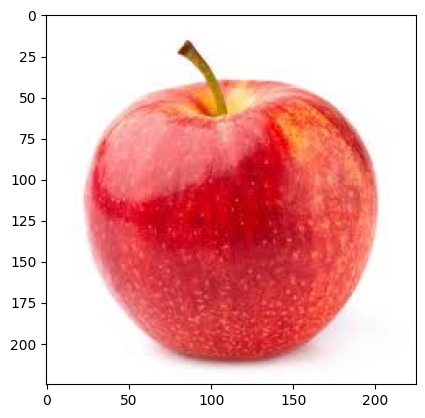

In [ ]:
apple_image =cv2.imread("apple.jpg")
apple_image =cv2.cvtColor(apple_image,cv2.COLOR_BGR2RGB)
plt.imshow(apple_image)

In [ ]:
prep_apple= tf.keras.applications.vgg16.preprocess_input(apple_image)

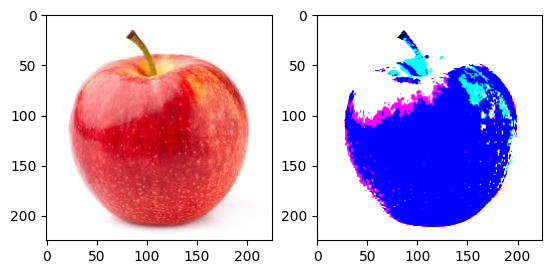

In [ ]:
plt.subplot(1,2,1)
plt.imshow(apple_image)

plt.subplot(1,2,2)
plt.imshow(prep_apple)

In [ ]:
#We need to know the sizeof the image required to be input image size for vgg
vgg16.input.shape

TensorShape([None, 224, 224, 3])

In [ ]:
prep_apple = cv2.resize(prep_apple, (224,224))

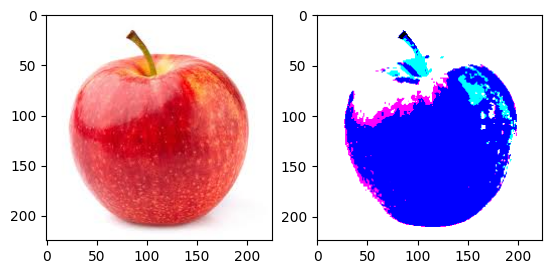

In [ ]:
plt.subplot(1,2,1)
plt.imshow(apple_image)

plt.subplot(1,2,2)
plt.imshow(prep_apple)

In [ ]:
apple_image.shape , prep_apple.shape

((225, 225, 3), (224, 224, 3))

In [ ]:
#Now we expand the dimension of prep_apple
prep_apple = np.expand_dims(prep_apple, axis=0)

In [ ]:
prep_apple.shape

(1, 224, 224, 3)

In [ ]:
#predicting apple
vgg16.predict(prep_apple)

1/1 [==============================] - 1s 994ms/step


array([[1.69637246e-07, 4.77454378e-05, 7.55464498e-07, 2.21900990e-07,
        2.55858708e-07, 1.50927281e-05, 2.45097880e-07, 4.43632525e-05,
        4.66395504e-05, 3.93841674e-06, 6.69111432e-06, 5.26060285e-06,
        2.58962118e-05, 9.21775438e-07, 1.62393223e-06, 3.08473136e-06,
        7.27936231e-06, 5.50681364e-07, 6.23819858e-07, 5.68914459e-07,
        1.72072006e-07, 6.67191159e-07, 1.92856760e-07, 5.17323713e-07,
        4.41128414e-08, 1.85873489e-07, 3.28097781e-06, 3.48671574e-06,
        6.77315427e-07, 1.98876260e-05, 6.70565612e-07, 1.37142581e-06,
        3.04987793e-06, 2.52170821e-07, 1.75705622e-07, 2.01026054e-07,
        1.25656970e-06, 1.73460791e-07, 4.01468725e-07, 2.49609002e-07,
        3.91887033e-06, 1.99160567e-07, 8.44930241e-07, 8.17978645e-08,
        2.05321982e-07, 5.57275200e-07, 1.92175708e-06, 3.20647956e-07,
        7.63073515e-08, 9.27551866e-08, 1.59435288e-07, 4.52730455e-06,
        1.34638412e-05, 2.93183916e-06, 1.19532694e-06, 2.376135

In [ ]:
result = vgg16.predict(prep_apple)


1/1 [==============================] - 1s 540ms/step


In [ ]:
np.argmax(result)

957

In [ ]:
#Decoding the index
tf.keras.applications.vgg16.decode_predictions(result)

35363/35363 [==============================] - 0s 0us/step


[[('n07768694', 'pomegranate', 0.35413283),
  ('n07742313', 'Granny_Smith', 0.25280508),
  ('n07745940', 'strawberry', 0.11070631),
  ('n07753113', 'fig', 0.048749603),
  ('n03729826', 'matchstick', 0.04527102)]]

In [ ]:
# Wrong prediction

In [ ]:
#Creating a Function to predict images
def pred_image(imagepath):
  #Read Image
  image = cv2.imread(imagepath)
  #Resize Image
  image = cv2.resize(image,(224,224))
  #preprocess the image
  image = tf.keras.applications.vgg16.preprocess_input(image)
  #Add one dim  if one image
  image = np.expand_dims(image, axis=0)

  #predict
  result = vgg16.predict(image)
  result = tf.keras.applications.vgg16.decode_predictions(result)
  return result

In [ ]:
# Get dog image
! wget https://petkeen.com/wp-content/uploads/2022/08/A-happy-Golden-Retriever-adult-male-dog-relaxing-in-a-park_Neelsky_Shutterstock-760x507.jpg

--2023-07-31 13:00:11--  https://petkeen.com/wp-content/uploads/2022/08/A-happy-Golden-Retriever-adult-male-dog-relaxing-in-a-park_Neelsky_Shutterstock-760x507.jpg
Resolving petkeen.com (petkeen.com)... 104.21.92.138, 172.67.194.136, 2606:4700:3033::ac43:c288, ...
Connecting to petkeen.com (petkeen.com)|104.21.92.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64949 (63K) [image/jpeg]
Saving to: ‘A-happy-Golden-Retriever-adult-male-dog-relaxing-in-a-park_Neelsky_Shutterstock-760x507.jpg’

A-happy-Golden-Retr 100%[===================>]  63.43K  --.-KB/s    in 0.008s  

2023-07-31 13:00:11 (7.47 MB/s) - ‘A-happy-Golden-Retriever-adult-male-dog-relaxing-in-a-park_Neelsky_Shutterstock-760x507.jpg’ saved [64949/64949]



In [ ]:
pred_image("golden_retriever.jpg")

1/1 [==============================] - 1s 541ms/step


[[('n02100735', 'English_setter', 0.8297315),
  ('n02101556', 'clumber', 0.07649456),
  ('n02092339', 'Weimaraner', 0.039709162),
  ('n02101006', 'Gordon_setter', 0.031610753),
  ('n02102480', 'Sussex_spaniel', 0.008614646)]]

In [ ]:
#Model Thinks Golden Retriever as English_setter

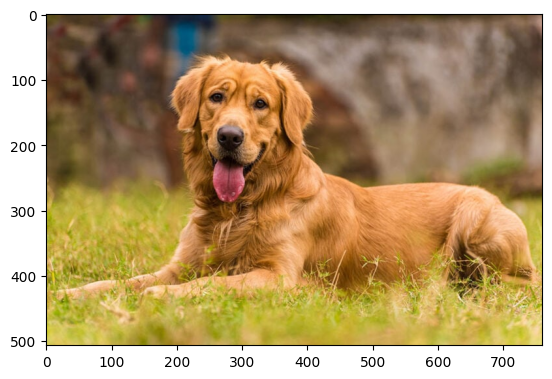

In [ ]:
golden_retriever_image= cv2.imread('golden_retriever.jpg')
golden_retriever_image = cv2.cvtColor(golden_retriever_image,cv2.COLOR_BGR2RGB)
plt.imshow(golden_retriever_image)

In [ ]:
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg

--2023-07-31 13:33:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487541 (476K) [image/jpeg]
Saving to: ‘1200px-Cat_November_2010-1a.jpg’

1200px-Cat_November 100%[===================>] 476.11K  --.-KB/s    in 0.09s   

2023-07-31 13:33:55 (5.45 MB/s) - ‘1200px-Cat_November_2010-1a.jpg’ saved [487541/487541]



In [ ]:
pred_image("1200px-Cat_November_2010-1a.jpg")

1/1 [==============================] - 1s 854ms/step


[[('n02124075', 'Egyptian_cat', 0.35742354),
  ('n02123045', 'tabby', 0.31797975),
  ('n02123159', 'tiger_cat', 0.24585001),
  ('n04254777', 'sock', 0.03000458),
  ('n03775071', 'mitten', 0.025424564)]]

In [ ]:
#Fake Image probability
a = np.ones((1, 1000 ))

In [ ]:
vgg_cat = tf.keras.applications.vgg16.decode_predictions(a, top=1000)

In [ ]:
len(vgg_cat[0])

1000

In [ ]:
vgg_cat[0]

[('n15075141', 'toilet_tissue', 1.0),
 ('n02319095', 'sea_urchin', 1.0),
 ('n02395406', 'hog', 1.0),
 ('n02391049', 'zebra', 1.0),
 ('n02389026', 'sorrel', 1.0),
 ('n02364673', 'guinea_pig', 1.0),
 ('n02363005', 'beaver', 1.0),
 ('n02361337', 'marmot', 1.0),
 ('n02356798', 'fox_squirrel', 1.0),
 ('n02346627', 'porcupine', 1.0),
 ('n02342885', 'hamster', 1.0),
 ('n02328150', 'Angora', 1.0),
 ('n02326432', 'hare', 1.0),
 ('n02325366', 'wood_rabbit', 1.0),
 ('n02321529', 'sea_cucumber', 1.0),
 ('n02317335', 'starfish', 1.0),
 ('n02229544', 'cricket', 1.0),
 ('n02281787', 'lycaenid', 1.0),
 ('n02281406', 'sulphur_butterfly', 1.0),
 ('n02280649', 'cabbage_butterfly', 1.0),
 ('n02279972', 'monarch', 1.0),
 ('n02277742', 'ringlet', 1.0),
 ('n02276258', 'admiral', 1.0),
 ('n02268853', 'damselfly', 1.0),
 ('n02268443', 'dragonfly', 1.0),
 ('n02264363', 'lacewing', 1.0),
 ('n02259212', 'leafhopper', 1.0),
 ('n02256656', 'cicada', 1.0),
 ('n02236044', 'mantis', 1.0),
 ('n02233338', 'cockroach', 1

In [ ]:
imagenet_cat = []
for i in vgg_cat[0]:
  imagenet_cat.append(i[1])

In [ ]:
# category of ImageNet
" ,".join(imagenet_cat)

"toilet_tissue ,sea_urchin ,hog ,zebra ,sorrel ,guinea_pig ,beaver ,marmot ,fox_squirrel ,porcupine ,hamster ,Angora ,hare ,wood_rabbit ,sea_cucumber ,starfish ,cricket ,lycaenid ,sulphur_butterfly ,cabbage_butterfly ,monarch ,ringlet ,admiral ,damselfly ,dragonfly ,lacewing ,leafhopper ,cicada ,mantis ,cockroach ,wild_boar ,warthog ,hippopotamus ,ox ,baboon ,patas ,guenon ,siamang ,gibbon ,chimpanzee ,gorilla ,orangutan ,three-toed_sloth ,armadillo ,badger ,skunk ,otter ,black-footed_ferret ,polecat ,mink ,weasel ,llama ,Arabian_camel ,gazelle ,impala ,hartebeest ,ibex ,bighorn ,ram ,bison ,water_buffalo ,walking_stick ,grasshopper ,ear ,toy_poodle ,kit_fox ,red_fox ,hyena ,African_hunting_dog ,dhole ,dingo ,coyote ,red_wolf ,white_wolf ,timber_wolf ,Mexican_hairless ,standard_poodle ,miniature_poodle ,Cardigan ,ant ,Pembroke ,Brabancon_griffon ,keeshond ,chow ,Pomeranian ,Samoyed ,Great_Pyrenees ,Newfoundland ,Leonberg ,pug ,basenji ,affenpinscher ,dalmatian ,Arctic_fox ,grey_fox ,ta